In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
diabetes = pd.read_csv(r"C:\Users\Meiyappan\Desktop\DS_DATASETS\diabetes.csv")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### STEP 1 : HANDLING NULL VALUES

In [7]:
# No null values we can skip this step

diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### STEP 2 : HANDLING OUTLIERS

C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome'>

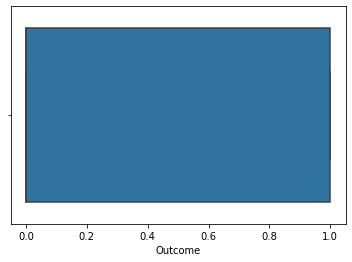

In [8]:
sns.boxplot(diabetes["Outcome"])

C:\Users\Meiyappan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

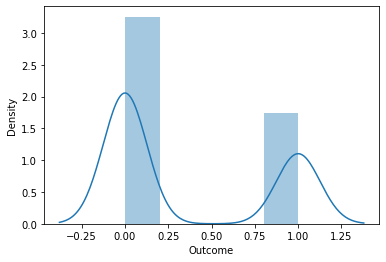

In [9]:
sns.distplot(diabetes["Outcome"])

### STEP 3 : SCALING

In [10]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

diabetes.iloc[:,0:8] = scale.fit_transform(diabetes.iloc[:,0:8])

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


### PAIR PLOT

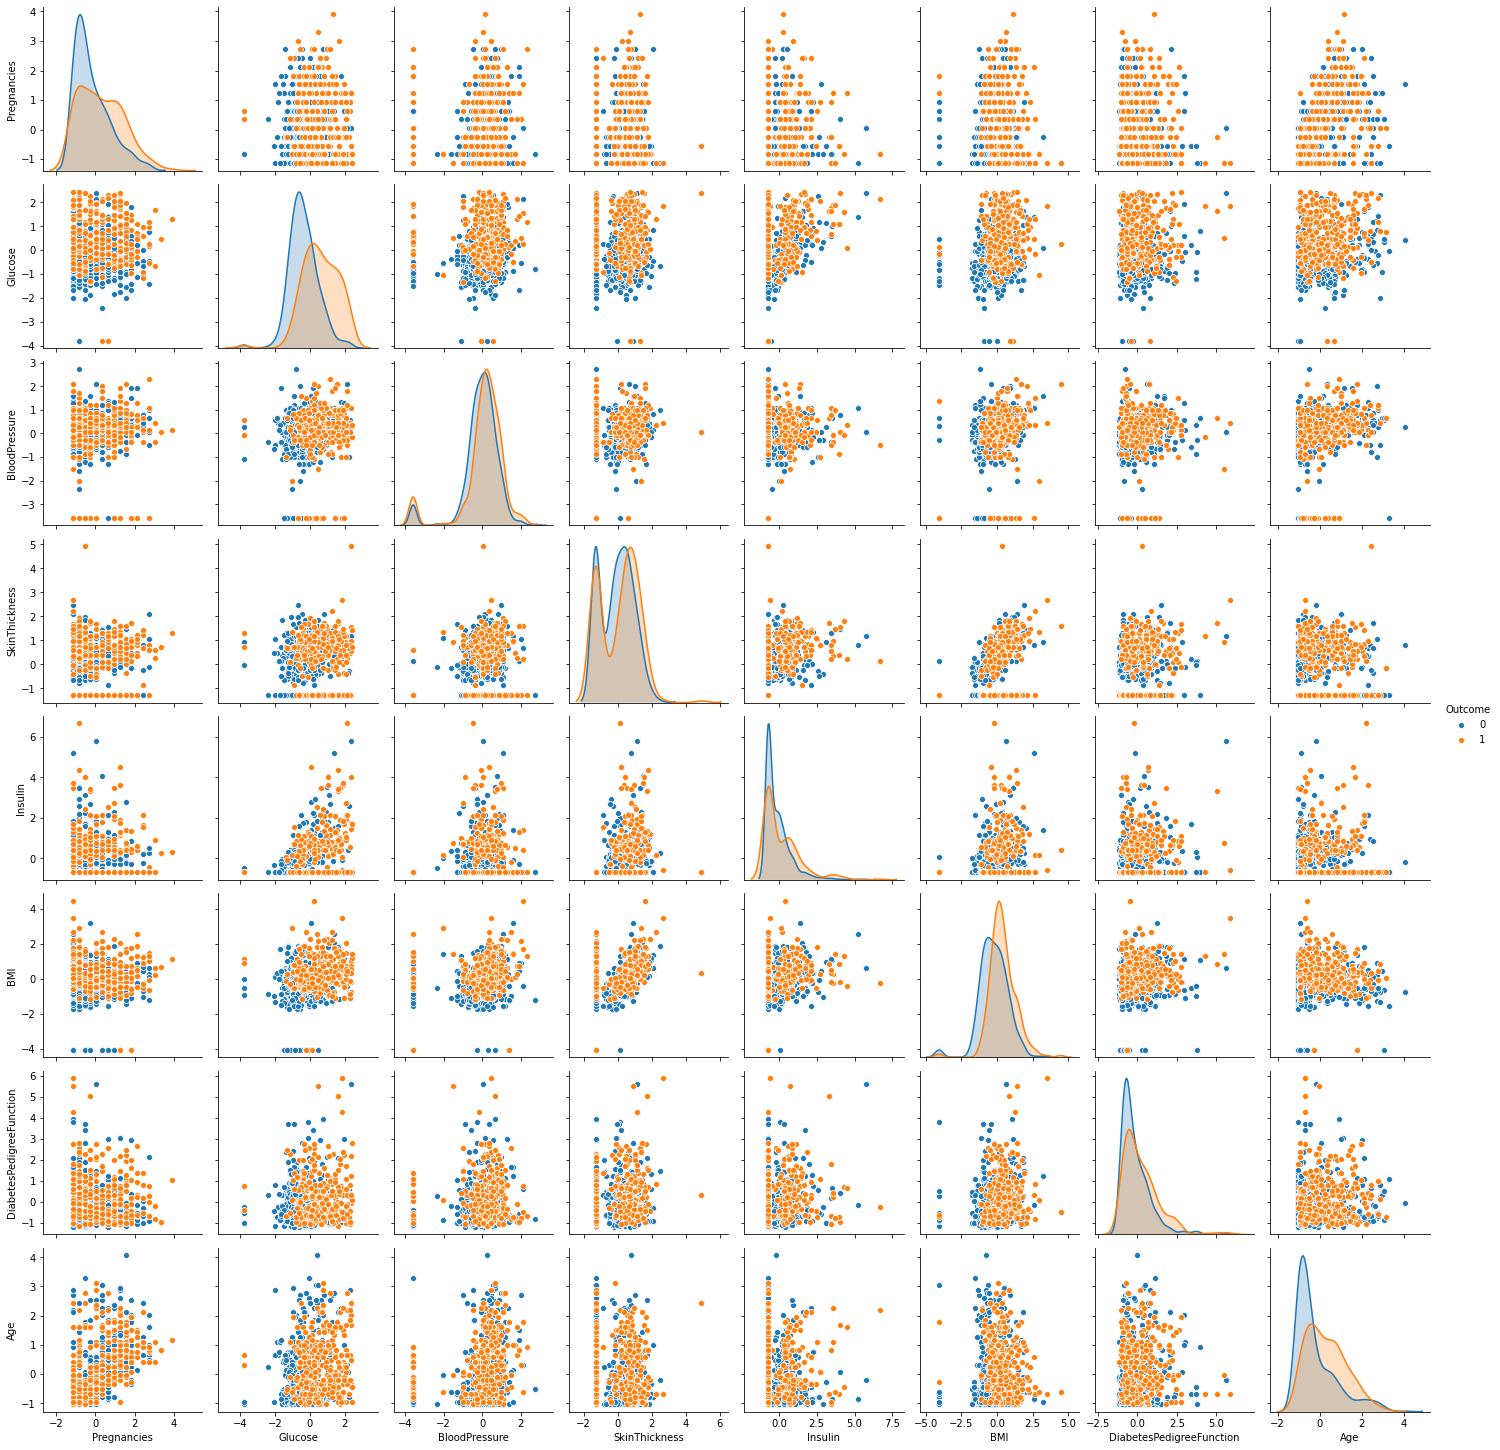

In [36]:
sns.pairplot(diabetes, hue="Outcome")

### STEP 4: CATEGORICAL

In [75]:
# no categorical data is available in the dataset

In [76]:
correlation = diabetes.corr()

correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

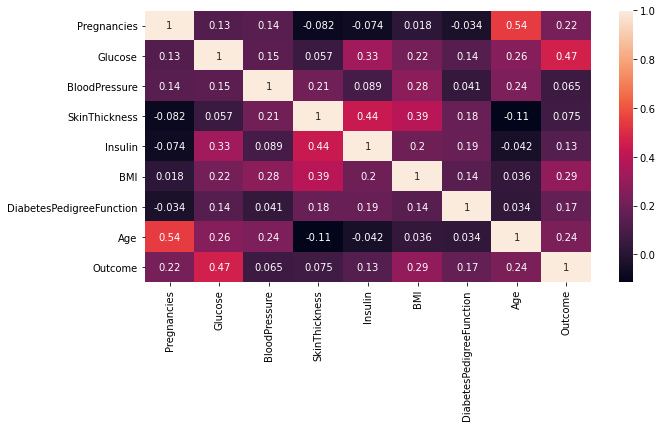

In [77]:
plt.figure(figsize = (10,5))

sns.heatmap(correlation, annot = True)

In [78]:
import statsmodels.api as sm

In [79]:
x = diabetes.drop(["Outcome"], axis = 1)

y = diabetes["Outcome"]

In [80]:
reg = sm.OLS(y, x).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.197
Model:                            OLS   Adj. R-squared (uncentered):              0.189
Method:                 Least Squares   F-statistic:                              23.37
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                    3.73e-32
Time:                        18:42:54   Log-Likelihood:                         -601.01
No. Observations:                 768   AIC:                                      1218.
Df Residuals:                     760   BIC:                                      1255.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0693      0.023      3.020      0.003       0.024       0.114
Glucose                      0.1892      0.022      8.646      0.000       0.146       0.232
BloodPressure               -0.0451      0.021     -2.161      0.031      -0.086      -0.004
SkinThickness                0.0025      0.024      0.105      0.917      -0.044       0.049
Insulin                     -0.0208      0.023     -0.907      0.365      -0.066       0.024
BMI                          0.1044      0.022      4.772      0.000       0.061       0.147
DiabetesPedigreeFunction     0.0488      0.020      2.459      0.014       0.010       0.088
Age                          0.0308      0.024      1.273      0.203      -0.017       0.078
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                         2.28
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
def vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF score'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

vif(x)

,Features,VIF score
0,Pregnancies,1.430872
1,Glucose,1.298961
2,BloodPressure,1.181863
3,SkinThickness,1.507432
4,Insulin,1.427536
5,BMI,1.297450
6,DiabetesPedigreeFunction,1.067090
7,Age,1.588368


In [102]:
# x = diabetes.drop(["Outcome", "SkinThickness", "Insulin", "Glucose", "Age"], axis = 1)

x = diabetes.drop(["Outcome", "SkinThickness", "Insulin"], axis = 1)

print(x.columns)

y = diabetes["Outcome"]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

### STEP 5 : HANDLING BALANCE & IMBALANCE DATA

In [104]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy="minority", random_state=100)

x_train_os, y_train_os = sm.fit_sample(x_train, y_train)

In [105]:
y_train_os.value_counts()

1    397
0    397
Name: Outcome, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(x_train_os, y_train_os)

LogisticRegression()

In [107]:
y_predict = lor.predict(x_test)

y_predict

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [108]:
lor.score(x_test, y_test)

0.7792207792207793

In [109]:
from sklearn import metrics

In [110]:
cnfx_matrix = metrics.confusion_matrix(y_test, y_predict)

cnfx_matrix

array([[81, 22],
       [12, 39]], dtype=int64)

In [111]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       103
           1       0.64      0.76      0.70        51

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.78      0.78       154



In [112]:
# 0 - low loss
# 1- high loss


metrics.log_loss(y_test, y_predict)

7.625558367340439

In [90]:
import statsmodels.api as sm

reg_1 = sm.OLS(y_test, sm.add_constant(x_test)).fit()

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     16.29
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           8.68e-13
Time:                        18:43:48   Log-Likelihood:                -68.683
No. Observations:                 154   AIC:                             149.4
Df Residuals:                     148   BIC:                             167.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3253      0.031     10.345      0.000       0.263       0.387
Pregnancies                  0.0536      0.031      1.717      0.088      -0.008       0.115
Glucose                      0.2433      0.034      7.119      0.000       0.176       0.311
BloodPressure               -0.0818      0.035     -2.344      0.020      -0.151      -0.013
BMI                          0.1036      0.036      2.915      0.004       0.033       0.174
DiabetesPedigreeFunction    -0.0178      0.030     -0.591      0.556      -0.078       0.042
==============================================================================
Omnibus:                        4.771   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.647
Skew:                           0.378   Prob(JB):                       0.0979
Kurtosis:                       2.609   Cond. No.                         1.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""